<a href="https://colab.research.google.com/github/Elisa-Cardoso/Elisa13062013/blob/main/TRABALHO_PRATICO_1_(ANALISTA_DE_DADOS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enunciado da Questão:

"Uma empresa de comércio eletrônico está enfrentando problemas com a
entrega de seus produtos para diferentes regiões do Brasil. A empresa deseja
desenvolver um modelo de regressão linear que possa prever a quantidade de
dias para entrega de acordo com o valor do frete, levando em consideração as
particularidades de cada região.
Com base nos dados disponíveis, a equipe de ciência de dados da empresa
precisa desenvolver um modelo que possa ser utilizado para estimar a
quantidade de dias de entrega de um produto, com base no valor do frete e
na região de destino. O objetivo é reduzir o tempo de entrega e melhorar a
satisfação dos clientes.

O modelo de regressão linear deve levar em consideração as diferenças de
influência de cada região no valor do frete e na quantidade de dias de entrega.
Além disso, o modelo deve ser capaz de prever com precisão a quantidade de
dias de entrega para diferentes valores de frete em cada região, permitindo
que a empresa tome decisões mais precisas e assertivas sobre o
gerenciamento da logística de seus produtos"

# Atividades
Para esta atividade, os alunos deverão criar um algoritmo de regressão linear
para prever a quantidade de dias para entrega de itens baseado no valor do
frete cobrado.
1. Criar um projeto no Google Drive.
2. Coletar e inserir o arquivo frete_dias_entrega.csv na plataforma.
3. Filtrar o dataset para a região sudeste.
4. Analisar os dados coletados.
5. Avaliar a relação entre as variáveis.
6. Criar algoritmo de regressão linear.
7. Responder às questões teóricas e práticas do trabalho.

# Analisando o comando da questão

"A empresa deseja desenvolver um modelo de regressão linear que possa **prever a quantidade de dias para entrega de acordo com o valor do frete**, levando em consideração as particularidades de cada região."

-- > Isto é: A quantidade de dias, em função do valor do frete.

X (Variável independente) = Valor do frete ;

y (Variável dependente) = Dias de entrega

# Importando as bibliotecas

In [2]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error , mean_squared_error

# Coletando Dados

In [3]:
dados = pd.read_csv('frete_dias_entrega.csv', sep=';')

# Analisando os dados coletados


In [4]:
# Visualizando arquivos da base de dados
dados.head()

,Região,Valor do Frete,Dias para Entrega
0,Norte,49.59,20.0
1,Norte,117.57,3.0
2,Norte,98.15,7.0
3,Norte,96.98,6.0
4,Norte,123.00,6.0


In [5]:
# Gerando algumas estatísticas da base de dados
dados.describe()

,Valor do Frete,Dias para Entrega
count,500.000000,500.000000
mean,90.735140,7.512000
std,22.870106,5.733725
min,-5.370000,1.000000
25%,77.107500,3.000000
50%,94.765000,7.000000
75%,107.187500,11.000000
max,128.950000,33.000000


In [6]:
# Verificando se existe algum valor nulo ou ausente
dados.isna().sum()

# O Dataset possui algum valor nulo? R: Não.

Região               0
Valor do Frete       0
Dias para Entrega    0
dtype: int64

In [7]:
# Verificando informações da base de dados
dados.info

<bound method DataFrame.info of            Região  Valor do Frete  Dias para Entrega
0           Norte           49.59               20.0
1           Norte          117.57                3.0
2           Norte           98.15                7.0
3           Norte           96.98                6.0
4           Norte          123.00                6.0
..            ...             ...                ...
495  Centro-Oeste           88.72                7.0
496  Centro-Oeste           66.35               11.0
497  Centro-Oeste           41.56               22.0
498  Centro-Oeste           73.28                9.0
499  Centro-Oeste           60.75               14.0

[500 rows x 3 columns]>

# Análise de correlação entre as variáveis



*   Correlação positiva: Quando duas variáveis que possuem correlação crescem ou descrescem juntas, ou seja, possuem relação direta.

*  Correlação negativa: Quando duas variáveis que possuem correlação, mas quando uma variável cresce, a outra descresce, ou vice-versa.



In [8]:
dados.corr()

<ipython-input-8-27ee38a39a92>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dados.corr()


,Valor do Frete,Dias para Entrega
Valor do Frete,1.000000,-0.861617
Dias para Entrega,-0.861617,1.000000


# Tratamento de dados

Nessa etapa, vamos preparar os dados para serem utilizados no modelo de Regressão linear. Essa transformação deve ser realizada para que os dados possam ter o formato que o algoritmo solicita como entrada.

## Selecionando a região sudeste

In [9]:
# Filtrando a região sudeste
dados_filtrados = dados.query('Região == "Sudeste"')
dados_filtrados

,Região,Valor do Frete,Dias para Entrega
200,Sudeste,106.04,8.0
201,Sudeste,103.51,1.0
202,Sudeste,82.69,13.0
203,Sudeste,108.23,4.0
204,Sudeste,116.11,1.0
...,...,...,...
295,Sudeste,84.04,5.0
296,Sudeste,108.20,4.0
297,Sudeste,96.42,4.0
298,Sudeste,115.34,5.0


In [10]:
# Qual A média do valor do frete para a região sudeste ? R: R$87.18 
dados_filtrados.describe()

,Valor do Frete,Dias para Entrega
count,100.000000,100.000000
mean,87.186500,8.120000
std,22.707019,5.733615
min,19.170000,1.000000
25%,73.017500,3.750000
50%,89.240000,7.000000
75%,106.190000,12.000000
max,119.570000,26.000000


# Análise gráfica entre as variáveis

<ipython-input-11-7515f09d284a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = dados_filtrados.corr()


<Axes: >

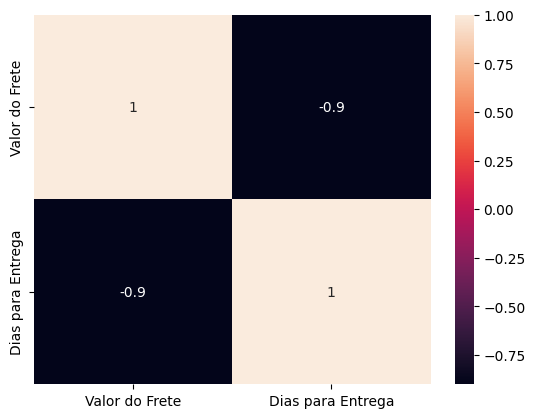

In [11]:
correlacao = dados_filtrados.corr()
sns.heatmap(correlacao , annot=True)

# Existe correlação entre as variáveis do dataset? R: Sim, existe uma correlação forte negativa de 0.9.


# Criando a variável independente - X

Coletamos todos os registros da primeira coluna (coluna um) e convertemos no formato array.



In [12]:
X = dados_filtrados.iloc[:,1].values
print(X)

[106.04 103.51  82.69 108.23 116.11 116.26  92.89 116.46 111.23  48.95
  41.5   78.98 102.68  63.54  92.67  49.36  59.45  89.51  91.84  70.88
 115.21  60.42 119.57  66.   118.7   37.7   88.29  56.9   87.75 101.31
  82.85  65.84  96.94  68.87  33.47  60.72 100.98 106.64 109.98  84.89
  76.32 100.53 117.47  86.73 115.8   69.96  98.35  84.64 118.49  94.12
  89.33  82.59 100.33 117.05  85.69  59.6  108.99  95.84 118.57  50.12
  80.26  74.58  57.69  60.26 115.93  88.84  92.82  89.15  96.69 114.66
 114.56  60.02  91.63 119.06  98.77  88.12  59.78  95.71  74.45  95.53
  87.85 109.58  19.17 107.31 107.27  93.99  83.67  73.73  84.72  75.63
  78.52  77.17  51.31  46.94 102.65  84.04 108.2   96.42 115.34  70.3 ]


# Criando a variável dependente - y  

y = O que queremos prever, no caso, a quantidade de dias para entrega.

In [13]:
y = dados_filtrados.iloc[:,2].values
print(y)

[ 8.  1. 13.  4.  1.  2. 11.  1.  4. 15. 18.  7.  6. 17.  9. 20. 16.  3.
  5. 11.  2. 18.  3. 13.  1. 17.  5. 16.  7.  4. 10. 15.  5.  9. 23. 12.
  9.  7.  1.  7.  6.  4.  1.  8.  1. 13.  9.  6.  2. 11. 11. 10.  8.  1.
 13. 16.  1.  5.  4. 19. 12. 10. 13. 12.  2.  3.  4.  7.  8.  3.  1. 16.
  2.  1.  2.  5. 15.  2.  8. 11.  5.  1. 26.  4.  1. 10.  7. 10.  7. 13.
 11. 12. 16. 14.  2.  5.  4.  4.  5. 13.]


# Verificando tipo de variáveis


In [14]:
type(X)

numpy.ndarray

In [15]:
type(y)

numpy.ndarray

In [16]:
X.shape

(100,)

# Transformando Array em Matriz

In [17]:
# Qual o comando que transforma um array em matriz? R: .reshape(-1,1)

X = X.reshape(-1,1)
X.shape

(100, 1)

# Criando modelo de machine learning - Regressão Linear


In [18]:
from sklearn.linear_model import LinearRegression
predicao_dados = LinearRegression()

# Realizando o treinamento do modelo

In [19]:
predicao_dados.fit(X,y)

LinearRegression()

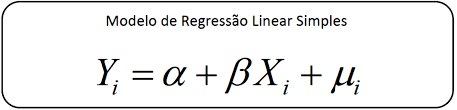

# Calculando a constante alfa - intercept

In [20]:
# Qual comando retorna o valor da constante alfa de uma função linear? R: .intercept_
predicao_dados.intercept_

27.94772254633564

# Calculando o coeficiente angular da reta - coef

In [21]:
# Qual é o valor do coeficiente angular? R: -0.227
predicao_dados.coef_

array([-0.22741735])

# Realizando a previsão dos valores

In [22]:
previsao_valores = predicao_dados.predict(X)

In [23]:
# Visualizando as previsões para a Data de entrega
previsao_valores

array([ 3.83238704,  4.40775293,  9.1425821 ,  3.33434305,  1.54229436,
        1.50818175,  6.82292516,  1.46269829,  2.65209101, 16.8156434 ,
       18.50990264,  9.98630046,  4.59650933, 13.4976243 ,  6.87295698,
       16.72240229, 14.42776125,  7.59159579,  7.06171337, 11.82838097,
        1.74696997, 14.20716643,  0.75543034, 12.93817763,  0.95328343,
       19.37408855,  7.86904496, 15.00767549,  7.99185032,  4.9080711 ,
        9.10619533, 12.9745644 ,  5.9018849 , 12.28548984, 20.33606393,
       14.13894122,  4.98311882,  3.69593664,  2.9363627 ,  8.64226394,
       10.5912306 ,  5.08545663,  1.23300676,  8.22381602,  1.61279373,
       12.03760493,  5.58122644,  8.69911827,  1.00104107,  6.54320182,
        7.63253092,  9.16532384,  5.1309401 ,  1.32852205,  8.46033006,
       14.39364865,  3.16150587,  6.15204399,  0.98284768, 16.5495651 ,
        9.69520626, 10.98693679, 14.82801578, 14.2435532 ,  1.58322948,
        7.74396542,  6.83884437,  7.67346604,  5.95873924,  1.87

# Visualizando no gráfico as disposições dos dados

Para visualizar os dados no gráfico, temos que transformar os valores das variáveis para o formato de vetor.

Para isso, utilizaremos o comando: ravel()

# Gerando visualização gráfica dos dados


In [24]:
# Gráfico 1 (Mais simples)
grafico = px.scatter(x = X.ravel(), y=y)
grafico.show()

In [25]:
# Gráfico 2 (mais detalhado)
# Qual é a representação gráfica do modelo de regressão criado? R:
grafico = px.scatter(x = X.ravel(), y = y)
grafico.add_scatter(x = X.ravel(), y = previsao_valores, name = "Previsões")
grafico.show()



 Qual a diferença entre o valor predito e o valor real para o frente de R$37,70?

 R: Passando o mouse por sobre a linha de previsão obtemos: 
 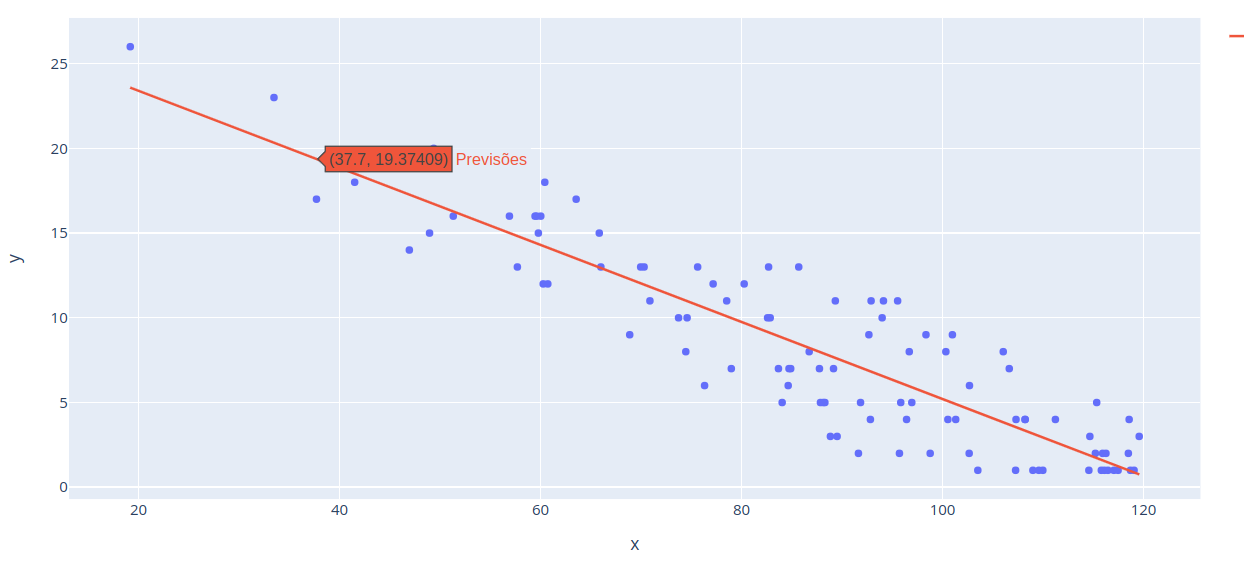



Mas o valor real é: 
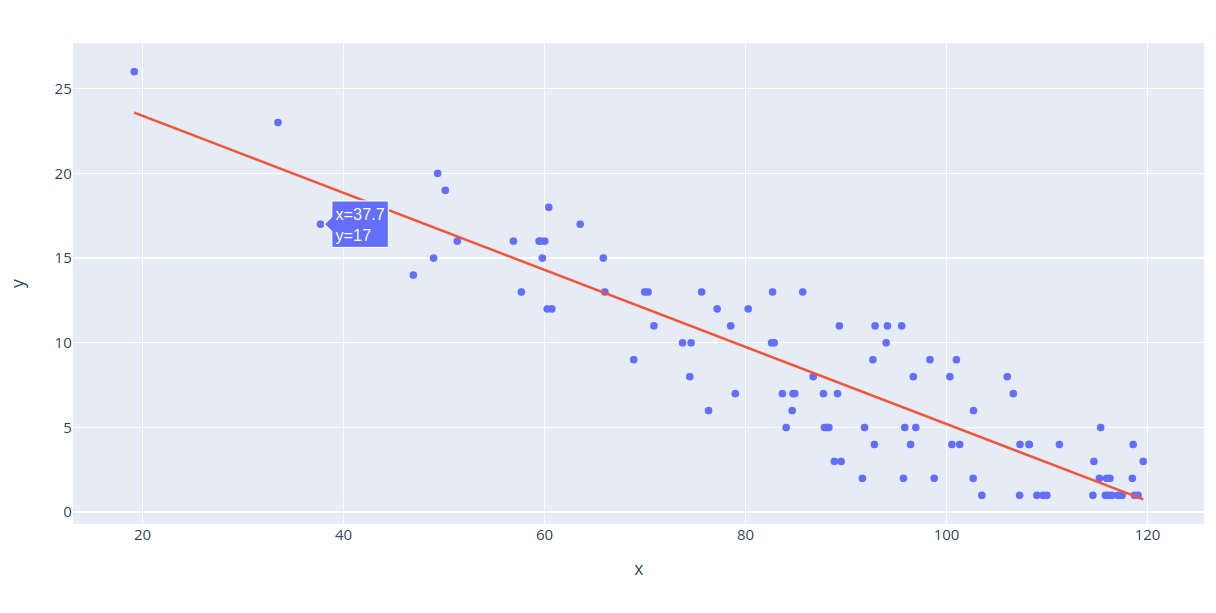

Assim, a diferença entre o valor real e o valor previsto é: 19.37 - 17 = 2.37

In [26]:
# Qual a previsão de entrega de um item caso o frete seja de R$ 118,00? 
# Utilize a função de arredondamento (round) para geração do resultado.
# R: Aproximadamente, 1 dia.

alfa = predicao_dados.intercept_
beta = predicao_dados.coef_
xi = 118

previsao_dias = (alfa + (beta * xi)).round()

previsao_dias 

array([1.])

In [27]:
# Qual a previsão de entrega de um item caso o frete seja de R$ 52.98? 
# Utilize a função de arredondamento (round) para geração do resultado.
# R: Aproximadamente, 16 dias.

alfa = predicao_dados.intercept_
beta = predicao_dados.coef_
xi = 52.98

previsao_dias = (alfa + (beta * xi)).round()

previsao_dias 

array([16.])

# Avaliação do Modelo

In [28]:
# Qual foi o score do modelo gerado? R:0.81
predicao_dados.score(X,y)

0.8111671052762233

In [29]:
# Calculando o Mean Absolut Error
erro = mean_absolute_error(y, previsao_valores)

In [30]:
# Qual o valor do mean absolute error do modelo criado? R: 2.09
erro

2.091861170350245